<a href="https://colab.research.google.com/github/unmiulast/Tokyo/blob/main/4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import scipy as sp
import pandas as pd
from pandas import Series, DataFrame

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

%matplotlib inline

%precision 3

np.random.seed(0)

In [2]:
dice = np.array([1, 2, 3, 4, 5, 6])

In [3]:
np.random.choice(dice, 1)

array([5])

試行 : ランダムに1つを抽出

根元事象（基本事象） : 1つずつの試行の結果

標本空間 S : 全ての可能な根元事象の集合

事象 : 標本空間の任意の部分集合

In [4]:
calc_steps = 1000
dice_rolls = np.random.choice(dice, calc_steps)

for i in range(1, 7):
  p = len(dice_rolls[dice_rolls == i]) / calc_steps
  print(i,'が出る確率', p)


1 が出る確率 0.171
2 が出る確率 0.158
3 が出る確率 0.157
4 が出る確率 0.183
5 が出る確率 0.16
6 が出る確率 0.171


dice_rolls == i

これは ブール配列（True/Falseの配列） を返します。

dice_rolls = [2, 3, 6, 3, 5, 3]
dice_rolls == 3
→ [False, True, False, True, False, True]

dice_rolls[dice_rolls == i]
これは「True になっている場所だけを抜き出す」フィルタリングです。

len(...)
最後にそのリストの長さを数えることで、
→ 「i が何回出たか」を求めているわけです。


ほぼ 1/6 ≒0.166 になる　→ 統計的確率


In [5]:
calc_steps = 1000
dice_rolls = np.random.choice(dice, calc_steps)

for i in range(1, 7):
  p = np.count_nonzero(dice_rolls == i) / calc_steps
  print(i,'が出る確率', p)

1 が出る確率 0.164
2 が出る確率 0.166
3 が出る確率 0.17
4 が出る確率 0.178
5 が出る確率 0.159
6 が出る確率 0.163


これも「dice_rolls == i が True になる回数」を数えます。



In [6]:
coin = np.array([0, 1])

calc_steps = 1000
coin_rolls = np.random.choice(coin, calc_steps)

for i in range(0,2):
  p = np.count_nonzero(coin_rolls == i) /calc_steps
  print(i,'が出る確率', p)


0 が出る確率 0.483
1 が出る確率 0.517


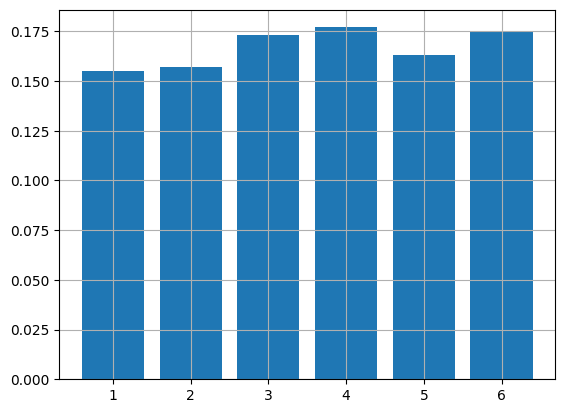

In [7]:
#一様分布(全ての事象が起こる確率が等しい)
calc_steps = 1000
dice_rolls = np.random.choice(dice, calc_steps)

prob_data = np.array([])

for i in range(1,7):
  p = len(dice_rolls[dice_rolls == i]) / calc_steps
  prob_data = np.append(prob_data, p)

plt.bar(dice, prob_data)
plt.grid(True)

0 が出る確率 0.625
1 が出る確率 0.375


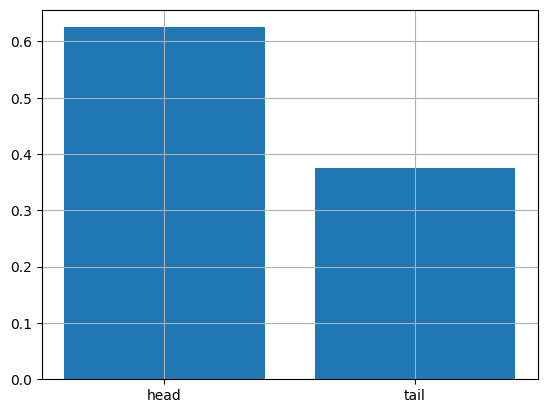

In [8]:
#ベルヌーイ試行（結果が2種類しかない）

proba_data = np.array([])

coin_data = np.array([0,0,0,0,0,1,1,1])

for i in np.unique(coin_data):
  p = len(coin_data[coin_data == i]) / len(coin_data)
  print(i,'が出る確率',p)
  proba_data = np.append(proba_data, p)

plt.bar([0,1], proba_data,align='center')
plt.xticks([0,1],['head', 'tail'])
plt.grid(True)

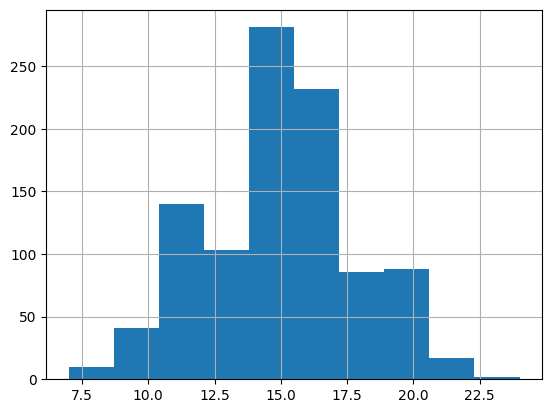

In [9]:
#二項分布（独立したベルヌーイ試行をn回繰り返す）
x = np.random.binomial(30,0.5,1000)
#binomial(試行回数n, 確率, サンプル数)
plt.hist(x)
plt.grid(True)

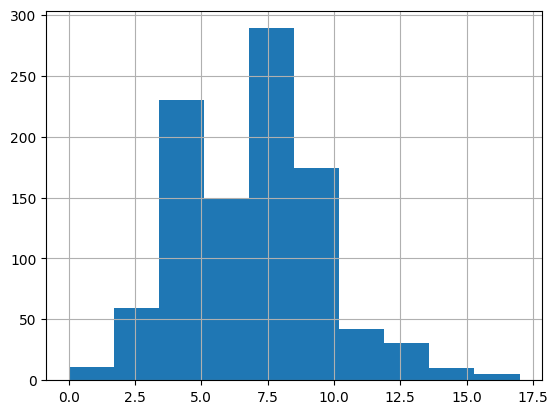

In [10]:
#ポアソン分布(稀なことが起こる確率,単位面積当たりの雨粒，1平米あたりの木の数など)
x = np.random.poisson(7,1000)
#poisson(事象が発生すると見込まれる回数, サンプル数)
plt.hist(x)
plt.grid(True)

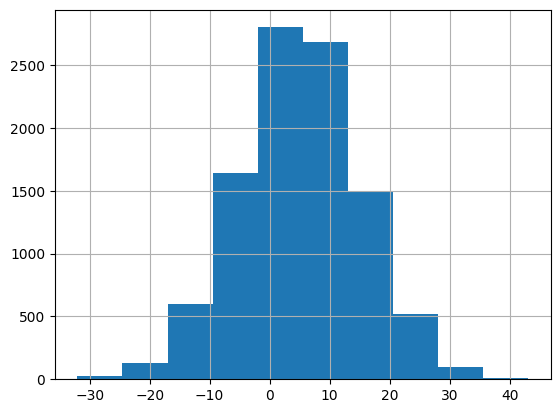

In [11]:
#正規分布(ガウス分布, 連続型の確率分布)

x = np.random.normal(5, 10, 10000)
#normal(平均, 標準偏差, サンプル数)
plt.hist(x)
plt.grid(True)

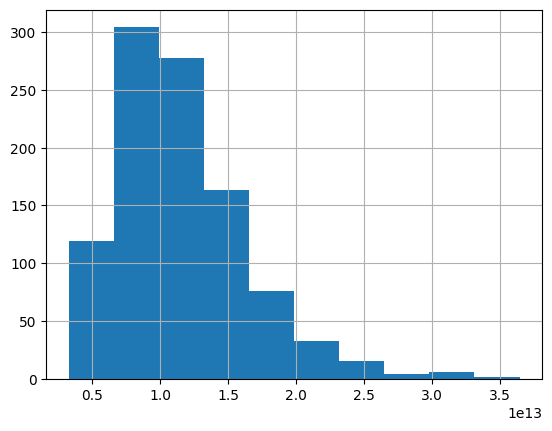

In [12]:
#対数正規分布

x = np.random.lognormal(30,0.4,1000)
plt.hist(x)
plt.grid(True)


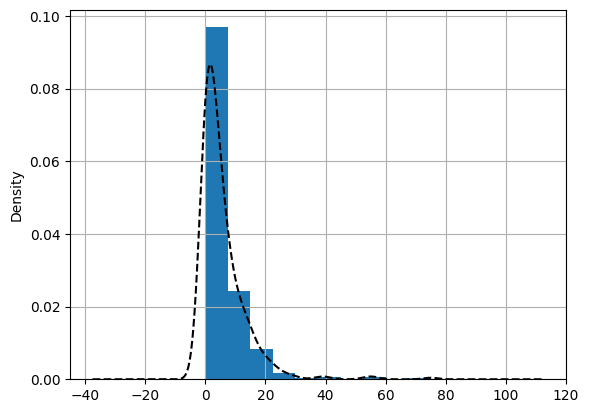

In [13]:
#カーネル密度関数(与えられたデータから密度関数を推定)
df = pd.read_csv('/content/student-mat.csv', sep = ';')
df.absences.plot(kind = 'kde', style = 'k--')
df.absences.hist(density = True)
plt.grid(True)

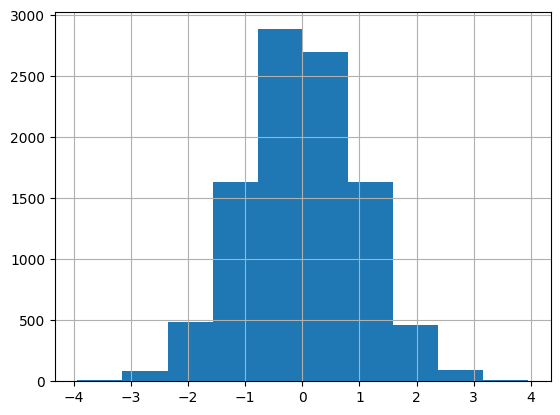

In [14]:
x = np.random.normal(0, 1, 10000)
plt.hist(x)
plt.grid(True)

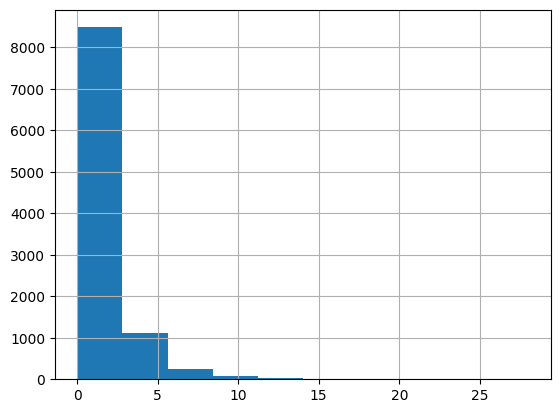

In [15]:
x = np.random.lognormal(0, 1, 10000)
plt.hist(x)
plt.grid(True)

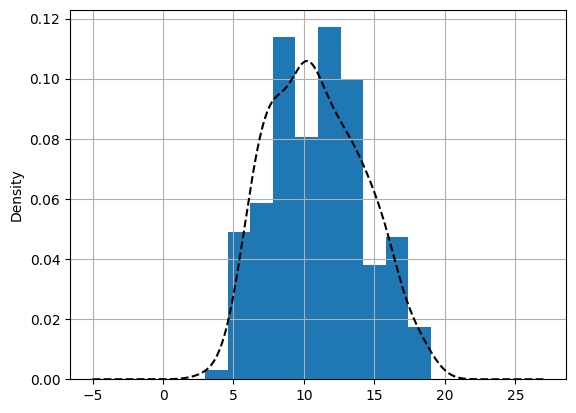

In [16]:
df['G1'].plot(kind = 'kde', style = 'k--')
df['G1'].hist(density = True)
plt.grid(True)

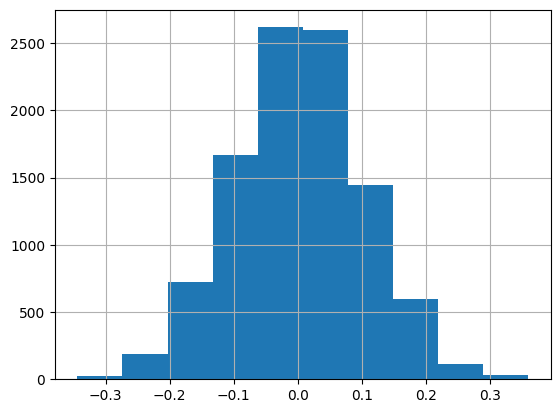

In [17]:
N =10000

data = [np.random.normal(0,1,100).mean() for _ in range(N)]

plt.hist(data)
plt.grid(True)

平均 0、標準偏差 1 の正規分布から100個の乱数を生成

その100個の値の**平均値（標本平均）**を取ります。

この処理を N回繰り返してリスト化します

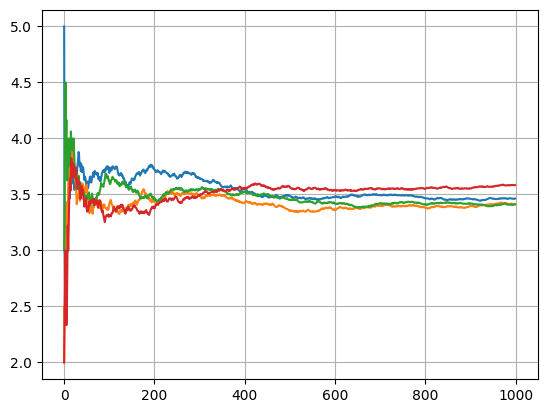

In [18]:
#大数の法則
calc_steps = 1000
dice = np.array([1, 2, 3, 4, 5, 6])
number = np.arange(1, calc_steps + 1)
#np.arange(start, stop) : start から stop - 1 までの連続した整数を生成します

for i in range(4):
  #.cumsum()は累積和
  p = np.random.choice(dice, calc_steps).cumsum()
  plt.plot(p / number) #配列と配列の割り算
  plt.grid(True)

期待値(3.5)に近づいていく

In [19]:
#中心極限定理
def function_central_theory(N):

  sample_array = np.array([1, 2, 3, 4, 5, 6])
  number_cut = np.append(1, N + 1)

  mean_array = np.array([])

  for i in range(1000):
    #.cumsum() → 累積和にしてから cum_variables[N-1] で合計を取る
    #cum_variables[N-1] / N → 平均値を計算して mean_array に追加
    cum_variables = np.random.choice(sample_array, N).cumsum()
    mean_array = np.append(mean_array, cum_variables[N-1] / N)

  plt.hist(mean_array)
  plt.grid(True)

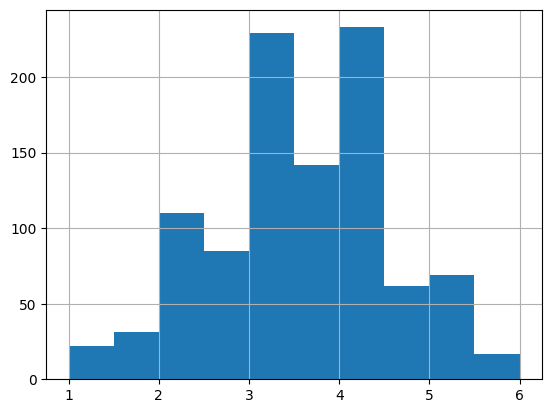

In [20]:
function_central_theory(3)

たとえ元の分布が一様や偏った形でも、標本平均をたくさん取っていくと正規分布（ガウス分布）に近づくという統計学の基本定理

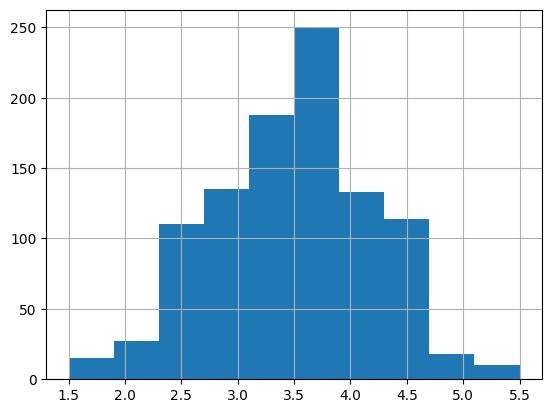

In [21]:
function_central_theory(6)

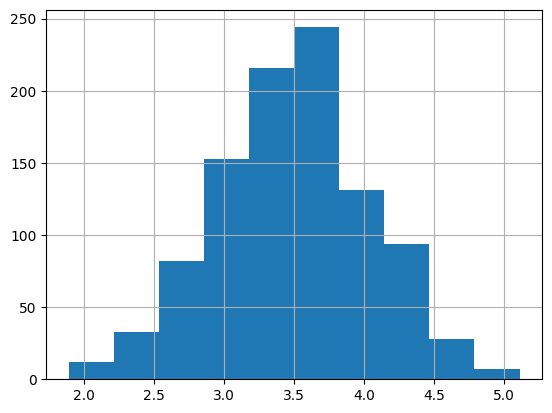

In [22]:
function_central_theory(9)

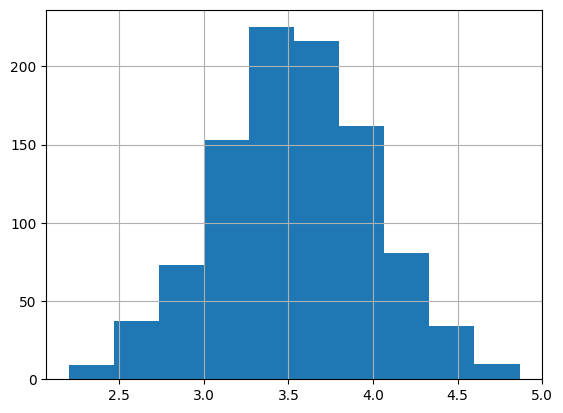

In [23]:
function_central_theory(15)

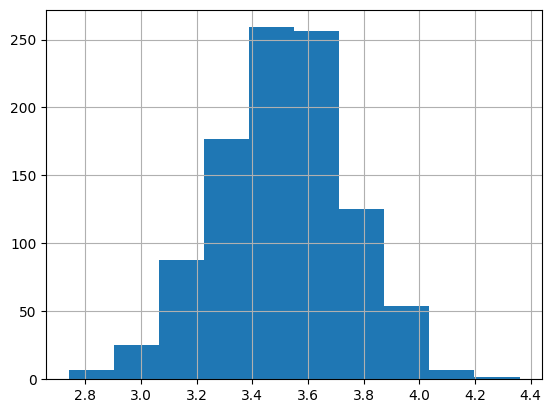

In [24]:
function_central_theory(50)

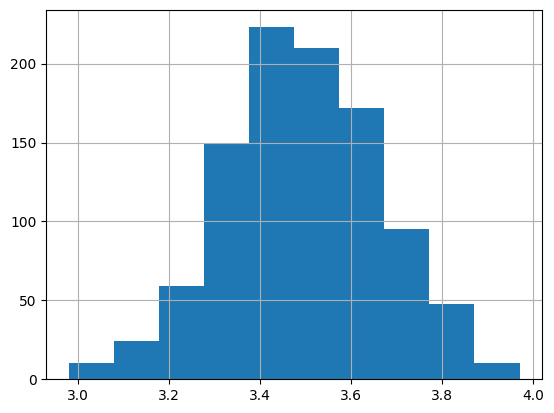

In [25]:
function_central_theory(100)

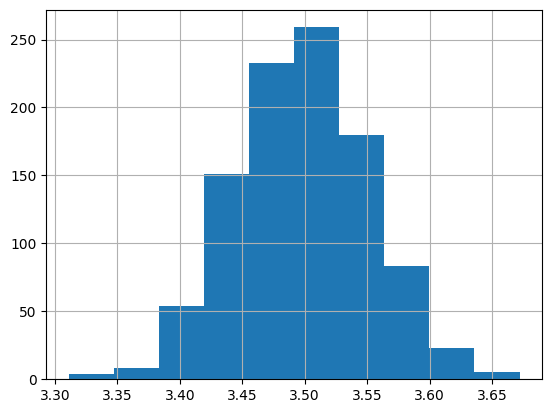

In [26]:
function_central_theory(1000)

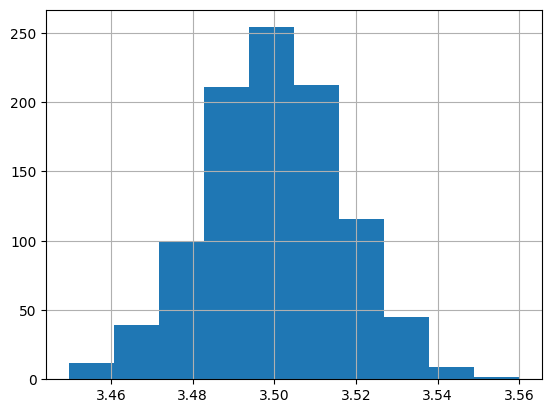

In [27]:
function_central_theory(10000)

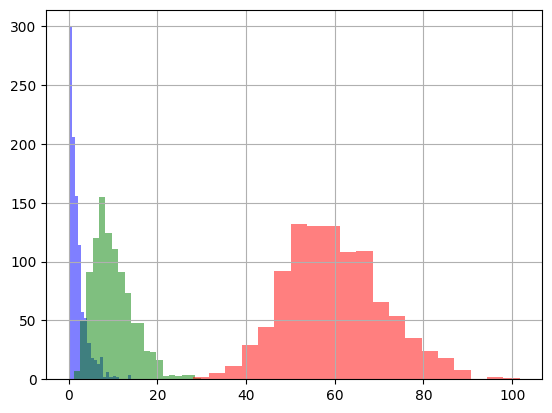

In [28]:
#カイ二乗分布
#自由度 2, 10, 60に従うカイ二乗分布が生成する乱数のヒストグラム

for df, c in zip([2, 10, 60], 'bgr'):
  x = np.random.chisquare(df, 1000)
  plt.hist(x, bins = 20 ,color =c,alpha=0.5)
  plt.grid(True)

自由度が小さいほど偏りが大きく、右に長い尾を持つ分布になる

自由度が大きいと分布は正規分布に近づく（中心極限定理）


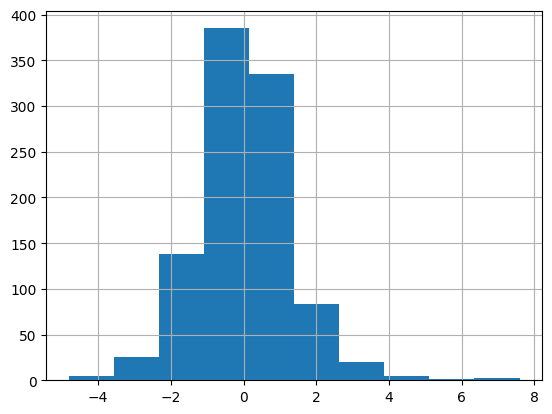

In [29]:
#ステューデントのt分布

# 自由度 5 の t 分布に従う乱数を 1000 個生成
x = np.random.standard_t(5, 1000)
plt.hist(x)
plt.grid(True)

スチューデントのt分布とは

母分散が未知で標本サイズが小さい場合に使われる確率分布

自由度が小さいほど「裾」が重い（外れ値が出やすい）。

自由度が大きくなると正規分布に近づく。

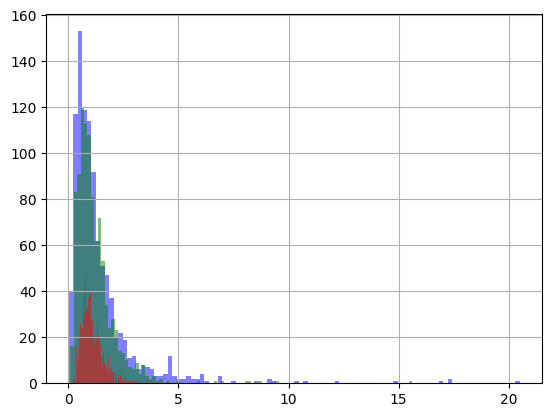

In [30]:
#スネディッカーのf分布


for df, c in zip([(6,7), (10,10), (20,25)], 'bgr'):
  #np.random.f(df1, df2, size)	自由度 df1（分子）と df2（分母）のF分布から size 個の乱数を生成
  x = np.random.f(df[0], df[1], 1000)
  plt.hist(x, 100, color = c,alpha = 0.5)
  plt.grid(True)

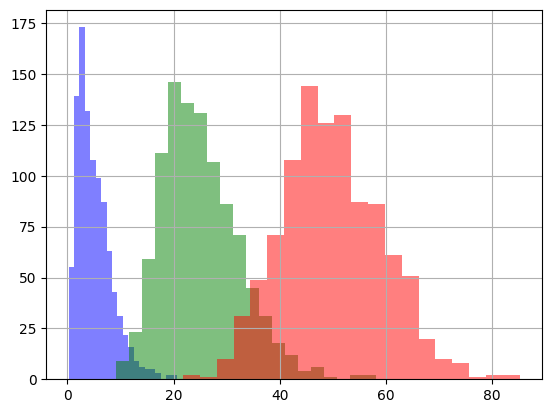

In [31]:
for df , c in zip([5, 25, 50], 'bgr'):
  x = np.random.chisquare(df, 1000)
  plt.hist(x, bins = 20, color = c, alpha = 0.5)
  plt.grid(True)

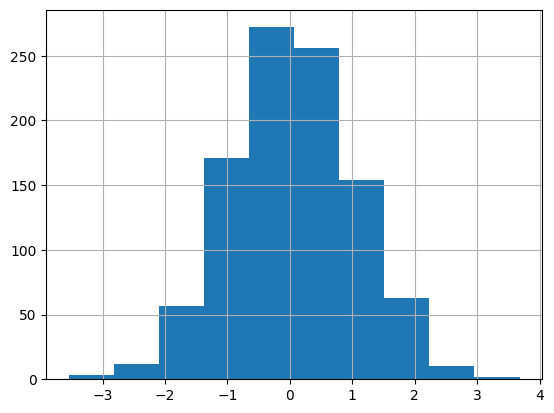

In [32]:
x = np.random.standard_t(100, 1000)
plt.hist(x)
plt.grid(True)

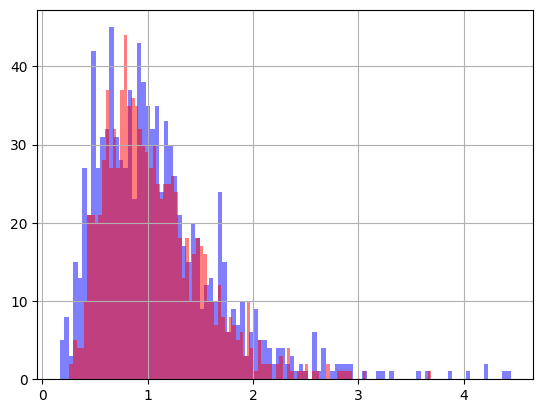

In [33]:
for df, c in zip([(10,30), (20, 25)], 'br'):
  x = np.random.f(df[0], df[1], 1000)
  plt.hist(x,bins = 100, alpha =0.5, color = c)
  plt.grid(True)

In [34]:
df = pd.read_csv('/content/student-mat.csv', sep =';')

df2 = pd.read_csv('/content/student-por.csv', sep = ';')

df_merge = pd.merge(df,
                    df2,
                    on=['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu',
                                 'Fedu', 'Mjob', 'Fjob', 'reason', 'nursery', 'internet'],
                    suffixes  = ('_math', '_por'))

In [35]:
df_merge.G1_math.mean()

np.float64(10.861256544502618)

In [36]:
df_merge.G1_por.mean()

np.float64(12.112565445026178)

In [37]:
from scipy import stats

t,p = stats.ttest_rel(df_merge.G1_math, df_merge.G1_por)

print('p値 =',p)

p値 = 1.6536555217101022e-16
